# Introduction to Machine Learning

The purpose of this notebook is to introduce basic concpets of machine learning and neural networks. We will use the following libraries:

- [numpy](https://numpy.org/) :  scientifc computing library
- [matplotlib](https://matplotlib.org/): Low level Vizualization library
- [seaborn](https://seaborn.pydata.org/): High Level Vizualization library
- [sklearn](https://scikit-learn.org/stable/): Machine Learning Library
- [tensorflow](https://www.tensorflow.org/): Deep Learning Library

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from matplotlib.animation import FuncAnimation
import time
from IPython import display
from sklearn.datasets import load_iris

np.random.seed(42)

# Set Seaborn Plotting theme
sns.set()

### Loading Iris Dataset

In [2]:
iris_df = sns.load_dataset("iris")
iris_df.head(5) # Show First 5 entries

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


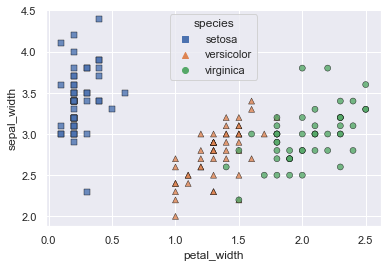

In [3]:
sns.scatterplot(data=iris_df, x="petal_width", y="sepal_width", hue="species",
                style="species", markers="s^o", edgecolor="black", alpha=0.8);

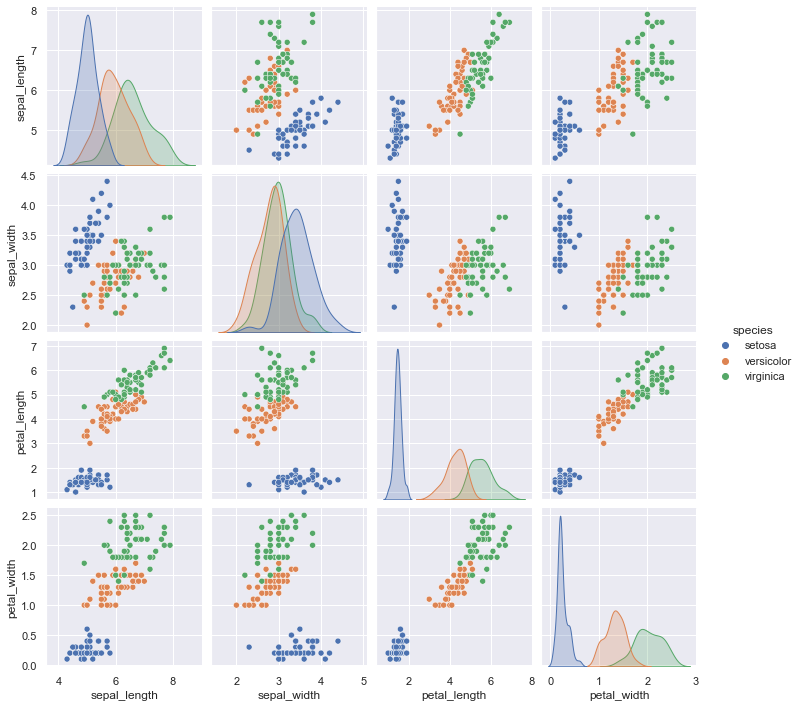

In [4]:
sns.pairplot(iris_df, hue="species")

### Data preparation and feature selection

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Note that is required to only use two features for our decision function vizualizations
# Please select two from ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_cols = np.array(['petal_width',  'petal_length'])

# Select only features_cols as Numpy Arrays (.values) 
X = iris_df.loc[:, feature_cols].values

# LabelEncoder Transforms string labels ("setosa", "versicolor", "virginica")
# into int labels (0, 1, 2)
le = preprocessing.LabelEncoder()
classes = iris_df.species.unique()
le.fit(classes)
y = le.transform(iris_df.species.values)

# Split train/test dataset; 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Our first Model, A Logistic Regression

In [6]:
from sklearn.linear_model import SGDClassifier

logisticRegression = SGDClassifier(loss='log')
epochs = 100

fig, ax = plt.subplots()

def animate(frame_num):
    logisticRegression.partial_fit(X_train, y_train, classes=[0, 1, 2])
    plt.clf()
    ax = plot_decision_regions(X_train, y_train, clf=logisticRegression);
    plt.title("Epoch: {}".format(frame_num))
    return ax

anim = FuncAnimation(fig, animate, frames=100, interval=200, repeat=False)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


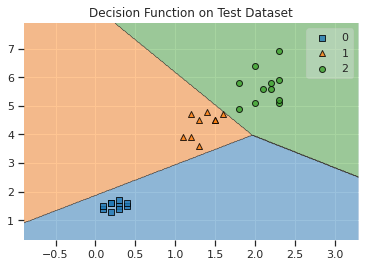

In [ ]:
plot_decision_regions(X_test, y_test, clf=logisticRegression);
plt.title("Decision Function on Test Dataset");

Model Accuracy: 1.0


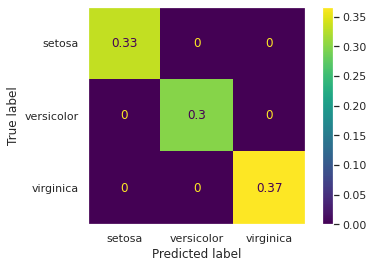

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = logisticRegression.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy: {}".format(acc))

cm = confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.gca().grid(False)

## K-Nearest Neighbors

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


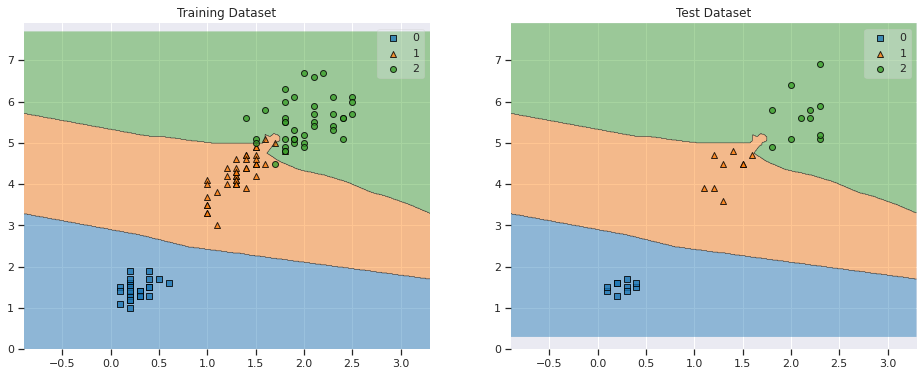

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=knn, ax=ax[0]);
ax[0].set_title("Training Dataset");

plot_decision_regions(X_test, y_test, clf=knn, ax=ax[1]);
ax[1].set_title("Test Dataset");

Model Accuracy: 1.0


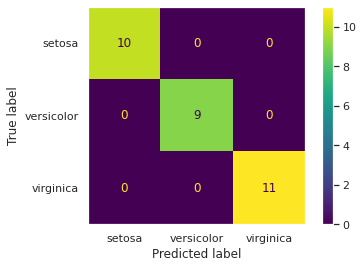

In [ ]:
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy: {}".format(acc))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.gca().grid(False)

### Support Vector Machines

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


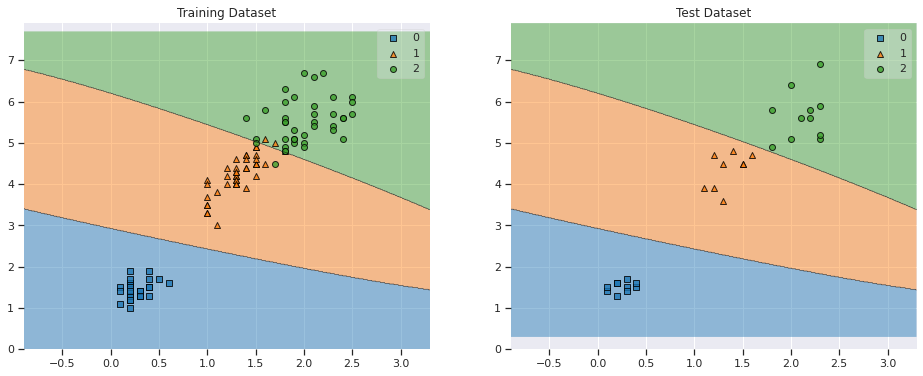

In [ ]:
from sklearn.svm import SVC

# Training a classifier
svm = SVC()
svm.fit(X_train, y_train)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=svm, ax=ax[0]);
ax[0].set_title("Training Dataset");

plot_decision_regions(X_test, y_test, clf=svm, ax=ax[1]);
ax[1].set_title("Test Dataset");

Model Accuracy: 1.0


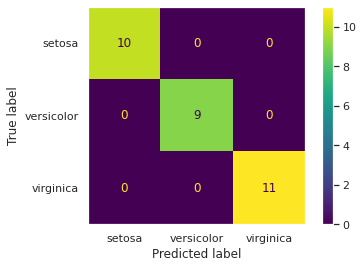

In [ ]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy: {}".format(acc))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.gca().grid(False)

## Desicion Trees

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


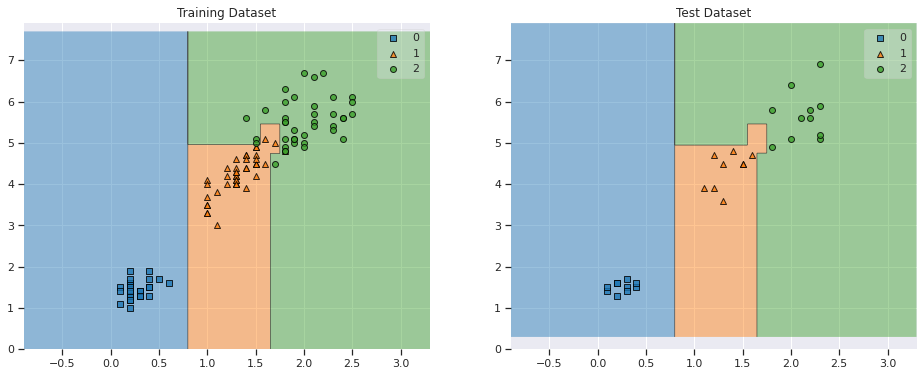

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=dtree, ax=ax[0]);
ax[0].set_title("Training Dataset");

plot_decision_regions(X_test, y_test, clf=dtree, ax=ax[1]);
ax[1].set_title("Test Dataset");

Model Accuracy: 1.0


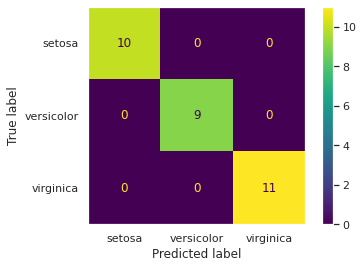

In [ ]:
y_pred = dtree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy: {}".format(acc))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.gca().grid(False)

## Random Forest Trees

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


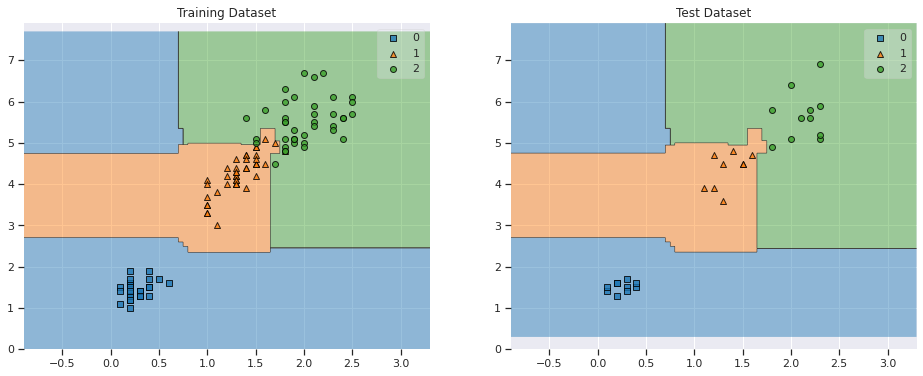

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(random_state=0)
rand_forest.fit(X_train, y_train)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=rand_forest, ax=ax[0]);
ax[0].set_title("Training Dataset");

plot_decision_regions(X_test, y_test, clf=rand_forest, ax=ax[1]);
ax[1].set_title("Test Dataset");

Model Accuracy: 1.0


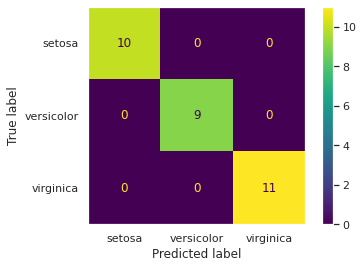

In [ ]:
y_pred = rand_forest.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy: {}".format(acc))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.gca().grid(False)

### Using all the features available

In [ ]:
feature_cols = np.array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X = iris_df.loc[:, feature_cols].values


# LabelEncoder Transforms string labels ("setosa", "versicolor", "virginica")
# into int labels (0, 1, 2)

le = preprocessing.LabelEncoder()
le.fit(iris_df.species.values)
y = le.transform(iris_df.species.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
logisticRegression = SGDClassifier(loss='log')
logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy: {}".format(acc))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("KNN Accuracy: {}".format(acc))

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("SVM Accuracy: {}".format(acc))

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy: {}".format(acc))

rand_forest = RandomForestClassifier(random_state=0)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {}".format(acc))

Logistic Regression Accuracy: 0.8
KNN Accuracy: 1.0
SVM Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


# Neural Networks

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


## Loading MNIST DATASET

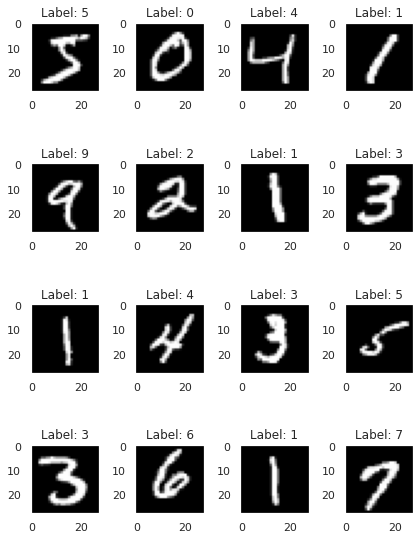

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

num_row = 4
num_col = 4

num = num_row * num_col
images = x_train[:num]
labels = y_train[:num]
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
    
    ax.grid(False)
plt.tight_layout()


## Neural Network Model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Convert squared images (28x28) into 784-dimension vector
  tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

## Model Compiling

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

## Training

In [ ]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2591 - accuracy: 0.9266


## Evaluation

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.1303 - accuracy: 0.9601 - 507ms/epoch - 2ms/step


[0.13029691576957703, 0.960099995136261]

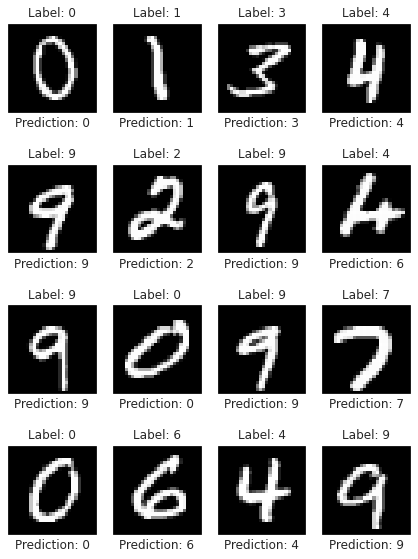

In [ ]:
y_pred = model.predict(x_test)
predicted_labels = np.argmax(y_pred, axis=1)

num_row = 4
num_col = 4

num = num_row * num_col
rand_idx = np.random.permutation(x_test.shape[0])
images = x_test[rand_idx[:num]]
labels = y_test[rand_idx[:num]]
predicted_labels = predicted_labels[rand_idx[:num]]
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Label: {}'.format(labels[i]))
    ax.set_xlabel('Prediction: {}'.format(predicted_labels[i]))
    
    ax.grid(False)
plt.tight_layout()